In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import os
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from torch.optim import AdamW
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

2025-07-23 11:15:47.433585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753269347.784453      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753269347.883931      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os

print(os.listdir("/kaggle/input/latest-dataset"))


['3gpp_research_intents_2025-07-22.csv']


In [3]:
df = pd.read_csv("/kaggle/input/latest-dataset/3gpp_research_intents_2025-07-22.csv")

In [4]:
df.columns

Index(['ID', 'Intent Type', 'Description', 'Timestamp', 'Priority',
       'Network Slice', 'Location', 'Technical Complexity', 'Research Context',
       'Compliance Standards', 'Parameters'],
      dtype='object')

In [5]:
df['Intent Type'].unique

<bound method Series.unique of 0        Regular Notification Request
1        Regular Notification Request
2               Intent Report Request
3               Intent Report Request
4               Intent Report Request
                     ...             
22027    Performance Assurance Intent
22028    Performance Assurance Intent
22029             Modification Intent
22030             Modification Intent
22031               Deployment Intent
Name: Intent Type, Length: 22032, dtype: object>

In [6]:

df = df.drop_duplicates(subset=["Description", "Intent Type"]).reset_index(drop=True)

train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["Intent Type"],
    random_state=42
)

train_df.to_csv("/content/train_intent_dataset.csv", index=False)
val_df.to_csv("/content/val_intent_dataset.csv", index=False)

print("✅ Train:\n", train_df["Intent Type"].value_counts())
print("✅ Val:\n", val_df["Intent Type"].value_counts())

✅ Train:
 Intent Type
Performance Assurance Intent    1744
Modification Intent             1615
Intent Report Request           1580
Regular Notification Request    1560
Intent Feasibility Check        1537
Deployment Intent               1373
Name: count, dtype: int64
✅ Val:
 Intent Type
Performance Assurance Intent    436
Modification Intent             404
Intent Report Request           395
Regular Notification Request    391
Intent Feasibility Check        384
Deployment Intent               343
Name: count, dtype: int64


In [7]:
assert set(train_df["Intent Type"]) == set(val_df["Intent Type"]), "🚨 Some intents are missing!"

**Bert Fine Tunning**

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 589/589 [02:25<00:00,  4.05it/s]


Epoch 1 | Train Loss: 0.1238 | Val Loss: 0.0011 | Accuracy: 1.0000 | F1: 1.0000


Epoch 2: 100%|██████████| 589/589 [02:32<00:00,  3.86it/s]


Epoch 2 | Train Loss: 0.0009 | Val Loss: 0.0004 | Accuracy: 1.0000 | F1: 1.0000


Epoch 3: 100%|██████████| 589/589 [02:32<00:00,  3.85it/s]


Epoch 3 | Train Loss: 0.0004 | Val Loss: 0.0002 | Accuracy: 1.0000 | F1: 1.0000


Epoch 4: 100%|██████████| 589/589 [02:32<00:00,  3.86it/s]


Epoch 4 | Train Loss: 0.0002 | Val Loss: 0.0001 | Accuracy: 1.0000 | F1: 1.0000


Epoch 5: 100%|██████████| 589/589 [02:32<00:00,  3.86it/s]


Epoch 5 | Train Loss: 0.0002 | Val Loss: 0.0001 | Accuracy: 1.0000 | F1: 1.0000


Epoch 6: 100%|██████████| 589/589 [02:32<00:00,  3.86it/s]


Epoch 6 | Train Loss: 0.0001 | Val Loss: 0.0001 | Accuracy: 1.0000 | F1: 1.0000


Epoch 7: 100%|██████████| 589/589 [02:32<00:00,  3.85it/s]


Epoch 7 | Train Loss: 0.0001 | Val Loss: 0.0001 | Accuracy: 1.0000 | F1: 1.0000


Epoch 8: 100%|██████████| 589/589 [02:33<00:00,  3.85it/s]


Epoch 8 | Train Loss: 0.0001 | Val Loss: 0.0000 | Accuracy: 1.0000 | F1: 1.0000


Epoch 9: 100%|██████████| 589/589 [02:32<00:00,  3.87it/s]


Epoch 9 | Train Loss: 0.0001 | Val Loss: 0.0000 | Accuracy: 1.0000 | F1: 1.0000


Epoch 10: 100%|██████████| 589/589 [02:32<00:00,  3.86it/s]


Epoch 10 | Train Loss: 0.0001 | Val Loss: 0.0000 | Accuracy: 1.0000 | F1: 1.0000


Epoch 11: 100%|██████████| 589/589 [02:32<00:00,  3.85it/s]


Epoch 11 | Train Loss: 0.0000 | Val Loss: 0.0000 | Accuracy: 1.0000 | F1: 1.0000


Epoch 12: 100%|██████████| 589/589 [02:32<00:00,  3.87it/s]


Epoch 12 | Train Loss: 0.0000 | Val Loss: 0.0000 | Accuracy: 1.0000 | F1: 1.0000


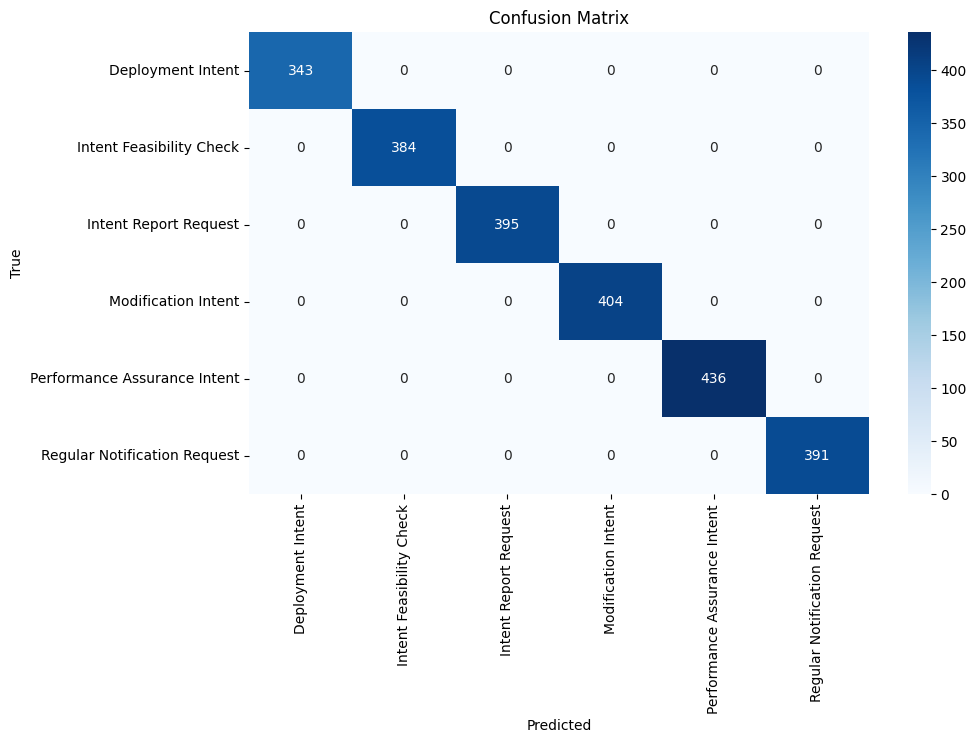


📊 Classification Report:
                              precision    recall  f1-score   support

           Deployment Intent       1.00      1.00      1.00       343
    Intent Feasibility Check       1.00      1.00      1.00       384
       Intent Report Request       1.00      1.00      1.00       395
         Modification Intent       1.00      1.00      1.00       404
Performance Assurance Intent       1.00      1.00      1.00       436
Regular Notification Request       1.00      1.00      1.00       391

                    accuracy                           1.00      2353
                   macro avg       1.00      1.00      1.00      2353
                weighted avg       1.00      1.00      1.00      2353



In [8]:
class IntentDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, return_tensors="pt")
        self.labels = torch.tensor(labels)

    def __getitem__(self, idx):
        item = {k: v[idx] for k, v in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)

train_df = pd.read_csv("/content/train_intent_dataset.csv")
val_df = pd.read_csv("/content/val_intent_dataset.csv")

label_list = sorted(train_df['Intent Type'].unique())
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for label, i in label2id.items()}

train_df['label_id'] = train_df['Intent Type'].map(label2id)
val_df['label_id'] = val_df['Intent Type'].map(label2id)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_df['label_id']), y=train_df['label_id'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

train_dataset = IntentDataset(train_df['Description'].tolist(), train_df['label_id'].tolist())
val_dataset = IntentDataset(val_df['Description'].tolist(), val_df['label_id'].tolist())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_list))
model.config.label2id = label2id
model.config.id2label = id2label
model.to(device)


optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 12
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps)

loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

EPOCHS = 12
best_f1 = 0.0

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch["labels"])
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)

    model.eval()
    val_loss = 0
    all_preds, all_true = [], []

    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = loss_fn(outputs.logits, batch["labels"])
            val_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(batch["labels"].cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    acc = accuracy_score(all_true, all_preds)
    f1 = f1_score(all_true, all_preds, average='macro')

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Accuracy: {acc:.4f} | F1: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        save_dir = "./bert_intent_model"
        os.makedirs(save_dir, exist_ok=True)
        model.save_pretrained(save_dir)
        tokenizer.save_pretrained(save_dir)

cm = confusion_matrix(all_true, all_preds)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_list, yticklabels=label_list, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\n📊 Classification Report:")
print(classification_report(all_true, all_preds, target_names=label_list))


In [9]:
save_directory = "./bert_finetuned_model"
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)


('./bert_finetuned_model/tokenizer_config.json',
 './bert_finetuned_model/special_tokens_map.json',
 './bert_finetuned_model/vocab.txt',
 './bert_finetuned_model/added_tokens.json')

In [10]:
import shutil
shutil.make_archive('train_folder', 'zip', './bert_finetuned_model')

'/kaggle/working/train_folder.zip'

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F


model_path = "./bert_finetuned_model" 
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

id2label = {
    0: "Deployment Intent",
    1: "Feasibility Check Intent",
    2: "Reporting Intent",
    3: "Modification Intent",
    4: "Performance Assurance Intent",
    5:"Regular Notification Request Intent"
}

def predict_intent(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        predicted_class_id = torch.argmax(probs, dim=1).item()
        confidence = torch.max(probs).item()

    predicted_label = id2label[predicted_class_id]
    return predicted_label, confidence

while True:
        user_input = input("Enter intent description (or 'exit' to quit): ")
        if user_input.lower() == "exit":
            break
        label, score = predict_intent(user_input)
        print(f"Predicted Intent: {label} (Confidence: {score:.2f})\n")

Enter intent description (or 'exit' to quit):  Establish advanced performance assurance framework for eMBB Cloud Gaming at Campus_Network_University_Hub_12_GPS_42.3601_71.0589 with custom tier service level guaranteeing 99.94% availability through predictive analytics, machine learning-based optimization, and autonomous remediation capabilities for advanced network research applications


Predicted Intent: Performance Assurance Intent (Confidence: 1.00)



Enter intent description (or 'exit' to quit):  Conduct advanced technical_only feasibility analysis for mMTC Asset Tracking implementation at Stadium_Sports_Complex_Network_01_GPS_40.7505_73.9934 with advanced risk modeling, economic impact assessment, and AI-driven recommendation engine providing defer guidance for research-informed decision making


Predicted Intent: Feasibility Check Intent (Confidence: 1.00)



Enter intent description (or 'exit' to quit):  Set up a URLLC slice for industrial IoT applications with ultra-low latency.


Predicted Intent: Feasibility Check Intent (Confidence: 0.79)

